In [10]:
import os
import sqlite3
import scipy.stats as stats
import pandas as pd
import numpy as np
from zipfile import ZipFile
from matplotlib import pyplot as plt

In [11]:
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))
ZIPPED_DATA_DIR = os.path.join(BASE_DIR, "zippedData")

In [12]:
dfs = {}

sql_db_file = "im.db"
movie_info_q = """
        SELECT * FROM movie_basics
        JOIN movie_akas USING(movie_id)
        ;"""
movie_people_q = """
        SELECT *
        FROM principals
        JOIN persons USING(person_id)
        ;"""

with ZipFile(os.path.join(ZIPPED_DATA_DIR, f"{sql_db_file}.zip"), 'r') as zip:
    zip.extract(sql_db_file)

    conn = sqlite3.connect(sql_db_file)
    
    dfs["movie_info_df"] = pd.read_sql(movie_info_q, conn)
    dfs["movie_people_df"] = pd.read_sql(movie_people_q, conn)

    os.remove(sql_db_file)


for file_name in os.listdir(ZIPPED_DATA_DIR):
    if not file_name in [sql_db_file + ".zip", ".DS_Store"]:
        sep = "\t" if "tsv" in file_name else ","
        try:
            dfs[file_name.split(".")[-3]] = pd.read_csv(os.path.join(ZIPPED_DATA_DIR, file_name), sep=sep, encoding="unicode_escape")
        except Exception as e:
            print(e, file_name)

In [33]:
x = dfs.get("movie_info_df").drop_duplicates(subset="movie_id")
x.start_year = x.start_year.apply(pd.to_numeric)
x[x.start_year > 2000][x.language == "en"]

/var/folders/z_/crwkmnv94dd46zfmf05zrpsm0000gn/T/ipykernel_66628/1285303276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.start_year = x.start_year.apply(pd.to_numeric)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title
5,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",1,One Day Before the Rainy Season,XWW,en,None,None,0.0
89,tt0262759,Seven Jews from My Class,Siedmiu Zydów z mojej klasy,2018,40.0,Documentary,1,Seven Jews from My Class,XWW,en,None,None,0.0
1176,tt0452664,Party Crashers,Os Penetras,2012,88.0,Comedy,1,Party Crashers,XWW,en,None,None,0.0
2070,tt0482459,Bandage,Bandeiji,2010,119.0,"Drama,Music,Romance",1,Love Band,HK,en,alternative,None,0.0
2091,tt0485061,U Want Me 2 Kill Him?,uwantme2killhim?,2013,92.0,"Drama,Thriller",1,U Want Me 2 Kill Him?,XWW,en,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
331636,tt9890758,Ultraman R/B the Movie: Select! The Crystal of...,Gekijôban Urutoraman Rûbu Serekuto! Kizuna no ...,2019,NaN,"Action,Sci-Fi",1,Ultraman R/B the Movie: Select! The Crystal of...,XWW,en,imdbDisplay,None,0.0
331658,tt9899840,Auntie Frog,Khaleh Ghurbagheh,2018,81.0,"Adventure,Comedy,Family",1,Auntie Frog,XWW,en,imdbDisplay,None,0.0
331664,tt9899860,Watching This Movie Is a Crime,Didan in film jorm ast,2019,100.0,"Drama,Thriller",1,Watching This Movie Is a Crime,XWW,en,imdbDisplay,None,0.0
331669,tt9899938,Journey of the Sky Goddess,Kibaiyanse! Watashi,2019,116.0,"Comedy,Drama",1,Journey of the Sky Goddess,XWW,en,imdbDisplay,None,0.0


In [14]:
for df in dfs:
    print(df)
    print(dfs.get(df).columns)
    print("\n")

movie_info_df
Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'ordering', 'title', 'region', 'language',
       'types', 'attributes', 'is_original_title'],
      dtype='object')


movie_people_df
Index(['movie_id', 'ordering', 'person_id', 'category', 'job', 'characters',
       'primary_name', 'birth_year', 'death_year', 'primary_profession'],
      dtype='object')


movies
Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')


reviews
Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')


movie_info
Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')


movie_budgets
Index(['id', 'release_date', 'movie', 'production_bud

In [15]:
budget_df = dfs.get("movie_budgets").replace('[\$,]', '', regex=True).apply(pd.to_numeric, errors="ignore")
budget_df = budget_df[budget_df["production_budget"] > 5000000].replace(0, np.nan).dropna()
budget_df["net_profit_ww"] = budget_df.worldwide_gross - budget_df.production_budget
budget_df["domestic_ROI"] = (budget_df.domestic_gross - budget_df.production_budget) / budget_df.production_budget
budget_df["worldwide_ROI"] = (budget_df.net_profit_ww) / budget_df.production_budget

dfs["movie_budgets"] = budget_df

budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit_ww,domestic_ROI,worldwide_ROI
0,1,Dec 18 2009,Avatar,425000000,760507625.0,2.776345e+09,2.351345e+09,0.789430,5.532577
1,2,May 20 2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875.0,1.045664e+09,6.350639e+08,-0.412899,1.546673
2,3,Jun 7 2019,Dark Phoenix,350000000,42762350.0,1.497624e+08,-2.002376e+08,-0.877822,-0.572108
3,4,May 1 2015,Avengers: Age of Ultron,330600000,459005868.0,1.403014e+09,1.072414e+09,0.388403,3.243841
4,5,Dec 15 2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382.0,1.316722e+09,9.997217e+08,0.956408,3.153696
...,...,...,...,...,...,...,...,...,...
4241,42,Oct 27 2000,A Room for Romeo Brass,5250000,20097.0,2.009700e+04,-5.229903e+06,-0.996172,-0.996172
4243,44,Aug 1 1944,Wilson,5200000,2000000.0,2.000000e+06,-3.200000e+06,-0.615385,-0.615385
4244,45,Aug 5 2005,Saint Ralph,5200000,795126.0,1.695126e+06,-3.504874e+06,-0.847091,-0.674014
4245,46,Apr 22 2011,Dum Maaro Dum,5200000,564489.0,1.163343e+07,6.433427e+06,-0.891444,1.237197


In [16]:

money_and_info_df = dfs.get("movie_budgets").join(dfs.get("movie_info"), on="id", how="inner", lsuffix="_budget")
money_and_info_df.sort_values("worldwide_ROI", ascending=False, inplace=True)
money_and_info_df[["theater_date", "dvd_date"]] = money_and_info_df[["theater_date", "dvd_date"]].apply(pd.to_datetime, errors="ignore", infer_datetime_format=True)
# money_and_info_df["WW_ROI_Cat"] = pd.cut(money_and_info_df.worldwide_ROI, bins=5, labels=False)
# plt.hist(money_and_info_df.WW_ROI_Cat)

# REMOVE OUTLIERS ———————————————————————————
ww_ROI = money_and_info_df["worldwide_ROI"]
Q1 = money_and_info_df["worldwide_ROI"].quantile(0.25)
Q3 = money_and_info_df["worldwide_ROI"].quantile(0.75)
IQR = Q3 - Q1

best_df = money_and_info_df[money_and_info_df.worldwide_ROI > Q3 + 1.5 * IQR]
money_and_info_df = money_and_info_df[money_and_info_df["worldwide_ROI"] < Q3 + 1.5 * IQR]
money_and_info_df = money_and_info_df[money_and_info_df["worldwide_ROI"] > Q1 - 1.5 * IQR]

In [17]:
best_writers = money_and_info_df[["writer", "worldwide_ROI"]][money_and_info_df["writer"].str.contains("\|")==False].groupby("writer").median().sort_values("worldwide_ROI", ascending=False)

best_directors = money_and_info_df[["director", "worldwide_ROI"]].groupby("director").median().sort_values("worldwide_ROI", ascending=False)

print(best_writers[:5], "\n",  best_directors[:5])

                 worldwide_ROI
writer                        
Wendell Mayes         1.529053
Jan Sardi             1.497769
Lawrence Kasdan       1.495098
Ken Englund           1.454209
Eric Bogosian         1.421871 
                    worldwide_ROI
director                        
Otto Preminger          1.529053
Bruce Beresford         1.497769
Steven Spielberg        1.495098
Herbert Wilcox          1.454209
Richard Linklater       1.421871


SpearmanrResult(correlation=0.8409983414646023, pvalue=0.0)
SpearmanrResult(correlation=0.41285563564891586, pvalue=1.703698281278604e-155)


Text(0, 0.5, 'WW Net Profit')

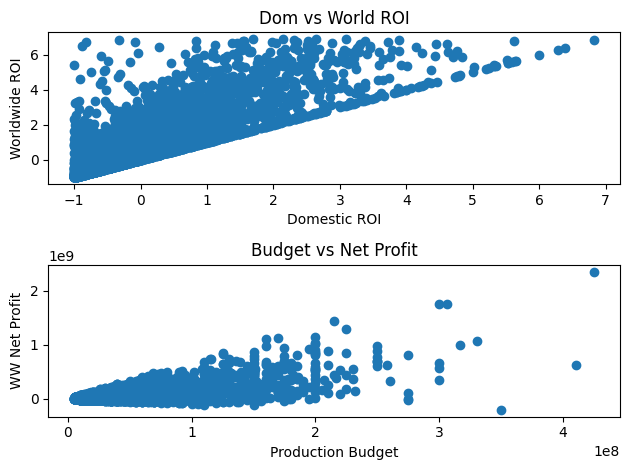

In [18]:
fig, (ax1, ax2) = plt.subplots(2, tight_layout=True)

print(stats.spearmanr(money_and_info_df.domestic_ROI, money_and_info_df.worldwide_ROI))
ax1.scatter(money_and_info_df.domestic_ROI, money_and_info_df.worldwide_ROI)
ax1.set_title("Dom vs World ROI")
ax1.set_xlabel("Domestic ROI")
ax1.set_ylabel("Worldwide ROI")

print(stats.spearmanr(money_and_info_df.production_budget, money_and_info_df.net_profit_ww))
ax2.scatter(money_and_info_df.production_budget, money_and_info_df.net_profit_ww)
ax2.set_title("Budget vs Net Profit")
ax2.set_xlabel("Production Budget")
ax2.set_ylabel("WW Net Profit")

SpearmanrResult(correlation=0.01743417838510342, pvalue=0.3699240815132149)

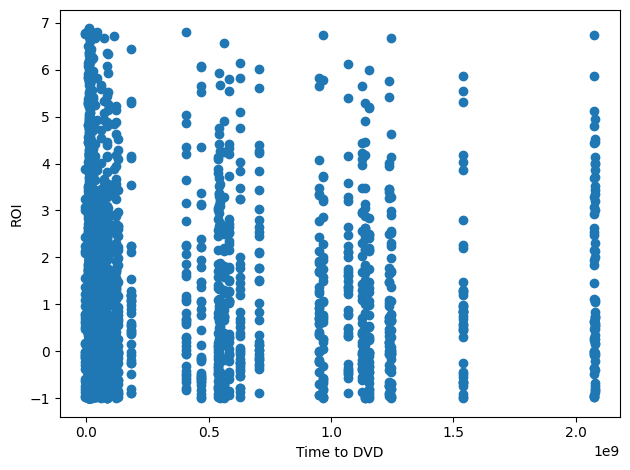

In [19]:
from datetime import timedelta

date_ROI = money_and_info_df[["worldwide_ROI", "theater_date", "dvd_date"]]
date_ROI = date_ROI.dropna()
date_ROI["time_to_dvd"] = (date_ROI.dvd_date - date_ROI.theater_date).apply(timedelta.total_seconds)

fig, ax = plt.subplots(tight_layout=True)
ax.scatter(date_ROI.time_to_dvd, date_ROI.worldwide_ROI)
ax.set_xlabel("Time to DVD")
ax.set_ylabel("ROI")
stats.spearmanr(date_ROI.time_to_dvd, date_ROI.worldwide_ROI)

In [20]:
def get_genre_df(from_df) -> pd.DataFrame:
    _genres_df = pd.DataFrame()

    for idx, row in from_df[["genre", "worldwide_ROI", "net_profit_ww", "production_budget"]].dropna().iterrows():
        if "|" in row.genre:
            genres = row.genre.split("|")
        else:
            genres = [row.genre]

        for genre in genres:
            new_row = row
            new_row.genre = genre
            new_row = pd.DataFrame(new_row).transpose()
            
            _genres_df = pd.concat([_genres_df, new_row], ignore_index=True)
    
    return _genres_df

genres_df = get_genre_df(money_and_info_df)
best_genres_df = get_genre_df(best_df)

In [21]:
test_col = "net_profit_ww"
print("ALL\n", genres_df.groupby("genre").median().sort_values(test_col, ascending=False)[:5])

print("\nHIGHEST PERFMORING\n", best_genres_df.groupby("genre").median().sort_values(test_col, ascending=False)[:5])

ALL
                              worldwide_ROI  net_profit_ww  production_budget
genre                                                                       
Animation                         1.433886     35098356.0         27500000.0
Television                        0.910158     28067218.0         30000000.0
Musical and Performing Arts       1.009514     24801448.5         29500000.0
Western                           0.953031     23722567.0         28000000.0
Art House and International       0.873145     22673277.0         30000000.0

HIGHEST PERFMORING
                       worldwide_ROI  net_profit_ww  production_budget
genre                                                                
Animation                 15.272461    320800479.0         20000000.0
Horror                    10.546124    264452897.0         19000000.0
Special Interest          12.786336    255726716.0         20000000.0
Mystery and Suspense      10.594410    238187582.0         19000000.0
Kids and Family

In [22]:
actors_df = dfs.get("movie_people_df")
actors_df = actors_df[actors_df["primary_profession"] == "actor"][["movie_id", "primary_name"]].dropna().drop_duplicates()

movies_df = dfs.get("movie_info_df")
movies_df = movies_df[movies_df["attributes"].apply(lambda x: not isinstance(x, str))]
movies_df = movies_df[movies_df.is_original_title == 1]
movies_df = movies_df[["movie_id", "title"]].dropna().drop_duplicates()

actor_movies_df = actors_df.merge(movies_df, on="movie_id", how="inner").rename(columns={"primary_name" :"actor"})

In [23]:
# The IMDB data is terrible and no conclusions should be drawn using it.
actors_df[actors_df.primary_name.isin(["Christian Bale", "Tom Hanks", "Tom Cruise", "Morgan Freeman", "Ryan Gosling", "Dwayne Johnson", "Scarlett Johansson"])] # garbage  

,movie_id,primary_name


In [24]:
actor_value_df = actor_movies_df.merge(money_and_info_df[["movie", "worldwide_ROI"]].rename(columns={"movie" :"title"}), on="title", how="inner")[["actor", "worldwide_ROI"]]
actor_value_df.groupby("actor").median().sort_values("worldwide_ROI", ascending=False)

,worldwide_ROI
actor,
Costas Mandylor,6.866781
Rafe Spall,6.681016
Ty Simpkins,6.669092
Corey Hawkins,6.220821
Phi Vu,6.131055
...,...
Sergio Peris-Mencheta,-0.994154
Nao Ohmori,-0.995463
Trieu Tran,-0.997398


In [25]:
# test_col = "net_profit_ww" 
test_col = "worldwide_ROI"

rating_roi_df = money_and_info_df[["rating", test_col]]
rating_roi_df = rating_roi_df[rating_roi_df.rating != "NR"]

print(rating_roi_df.groupby("rating").median().sort_values(test_col, ascending=False),"\n\n", rating_roi_df.rating.value_counts())

        worldwide_ROI
rating               
PG           0.796266
R            0.783617
G            0.765591
PG-13        0.692662 

 R        1664
PG        526
PG-13     416
G         149
Name: rating, dtype: int64


In [26]:
# TODO NORMALIZE ROI WITH NET PROFIT

def normalize(value, _min, _max):
    ''' Normalizes between 0.001 and 1 '''
    return (float(value) - _min) / (_max - _min) + 1e-3

x = range(-100, 110, 10)
print(list(x))
# 

_min, _max = min(x), max(x)
y = [normalize(val, _min, _max) for val in x]
print(y)

[-100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
[0.001, 0.051000000000000004, 0.101, 0.151, 0.201, 0.251, 0.301, 0.351, 0.401, 0.451, 0.501, 0.551, 0.601, 0.651, 0.701, 0.751, 0.801, 0.851, 0.901, 0.951, 1.001]


In [27]:
eff_df = money_and_info_df[["production_budget", "net_profit_ww", "worldwide_ROI", "movie", "rating", "genre"]][money_and_info_df.worldwide_ROI > 0.0] # All movies that turned a profit

eff_df["budg_normalized"] = eff_df.production_budget.apply(normalize, _min=eff_df.production_budget.min(), _max=eff_df.production_budget.max())
eff_df["wwROI_normalized"] = eff_df.worldwide_ROI.apply(normalize, _min=eff_df.worldwide_ROI.min(), _max=eff_df.worldwide_ROI.max())

eff_df["proff_score"] = eff_df.wwROI_normalized / eff_df.budg_normalized
eff_df.proff_score = eff_df.proff_score.apply(normalize, _min=eff_df.proff_score.min(), _max=eff_df.proff_score.max())

eff_df.sort_values("proff_score", ascending=False)

,production_budget,net_profit_ww,worldwide_ROI,movie,rating,genre,budg_normalized,wwROI_normalized,proff_score
4217,5500000,35768579.0,6.503378,Don Jon,PG-13,Action and Adventure|Drama|Science Fiction and...,0.001953,0.946765,1.001000
4236,5300000,23897694.0,4.508999,Rang De Basanti,R,Action and Adventure|Drama,0.001476,0.656717,0.918435
4216,5500000,31172493.0,5.667726,Shine,PG,Action and Adventure|Comedy|Drama,0.001953,0.825234,0.872635
4203,5700000,37344087.0,6.551594,Tom yum goong,NR,Drama|Romance,0.002429,0.953777,0.810856
4238,5250000,17664479.0,3.364663,La Vie d'AdÃÂ¨le Ã¢ÂÂ Chapitres 1 & 2,PG,Comedy|Drama|Romance,0.001357,0.490293,0.746033
...,...,...,...,...,...,...,...,...,...
90,179000000,2982519.0,0.016662,Jupiter Ascending,R,Art House and International|Comedy|Drama,0.415146,0.003385,0.001012
13,275000000,7778100.0,0.028284,John Carter,R,Comedy,0.643772,0.005075,0.001011
192,150000000,1525973.0,0.010173,Pan,R,Action and Adventure|Drama|Mystery and Suspense,0.346082,0.002441,0.001010
65,195000000,2687603.0,0.013783,Jack the Giant Slayer,NR,Drama,0.453251,0.002966,0.001009


In [28]:
stats.pearsonr(eff_df.proff_score, eff_df.net_profit_ww)

PearsonRResult(statistic=-0.11945019506944764, pvalue=1.1394522361264293e-09)

In [29]:
money_and_info_df

,id_budget,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit_ww,domestic_ROI,worldwide_ROI,id,...,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
749,50,Jul 9 2010,Despicable Me,69000000,251513985.0,5.434646e+08,4.744646e+08,2.645130,6.876298,64,...,PG-13,Comedy,Pat Proft,Pat Proft,1998-08-21,1998-12-22,NaN,NaN,86 minutes,NaN
134,35,Mar 17 2017,Beauty and the Beast,160000000,504014165.0,1.259200e+09,1.099200e+09,2.150089,6.869998,48,...,NR,Action and Adventure|Drama|Western,Edward Dmytryk,Ranald MacDougall,NaT,NaT,NaN,NaN,73 minutes,NaN
1378,79,Jun 19 2009,The Proposal,40000000,163958031.0,3.147097e+08,2.747097e+08,3.098951,6.867743,99,...,PG-13,Comedy|Romance,NaN,NaN,2002-12-20,2003-04-29,$,"93,300,000",102 minutes,Warner Bros.
2878,79,Oct 29 2010,Saw 3D,17000000,45710178.0,1.337353e+08,1.167353e+08,1.688834,6.866781,99,...,PG-13,Comedy|Romance,NaN,NaN,2002-12-20,2003-04-29,$,"93,300,000",102 minutes,Warner Bros.
3552,53,Nov 3 2017,Lady Bird,10000000,48958273.0,7.861077e+07,6.861077e+07,3.895827,6.861077,67,...,R,Horror,Matt Bettinelli-Olpin|Tyler Gillett,Lindsay Devlin,2014-01-17,2014-04-29,NaN,NaN,89 minutes,20th Century Fox
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2480,81,Oct 22 1999,Molly,21000000,17396.0,1.739600e+04,-2.098260e+07,-0.999172,-0.999172,101,...,R,Comedy|Drama|Television,Tommy Lee Wallace,NaN,1992-07-11,1993-04-21,NaN,NaN,90 minutes,NaN
1242,43,Nov 1 2013,Mr. Nobody,46500000,3622.0,2.225400e+04,-4.647775e+07,-0.999922,-0.999521,56,...,R,Drama,Allen Hughes|Albert Hughes,Michael Henry Brown|Albert Hughes|Allen Hughes,1995-10-06,1998-05-19,NaN,NaN,119 minutes,NaN
2152,53,Aug 24 1997,The Grimm Brothers' Snow White,26000000,5000.0,5.000000e+03,-2.599500e+07,-0.999808,-0.999808,67,...,R,Horror,Matt Bettinelli-Olpin|Tyler Gillett,Lindsay Devlin,2014-01-17,2014-04-29,NaN,NaN,89 minutes,20th Century Fox
3818,19,May 8 2015,Skin Trade,9000000,1242.0,1.242000e+03,-8.998758e+06,-0.999862,-0.999862,26,...,R,Art House and International|Comedy|Drama|Music...,Jim Jarmusch,Jim Jarmusch,2004-05-14,2004-09-21,$,"1,971,135",96 minutes,MGM


In [50]:
x = dfs.get("movie_info_df").drop_duplicates(subset="movie_id")
y = dfs.get("movie_people_df")

z = x.merge(y, on="movie_id")

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,ordering_x,title,region,language,...,is_original_title,ordering_y,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1,Sangharsh,IN,hi,...,0.0,10,nm0006210,composer,None,None,Naushad,1919.0,2006.0,"composer,soundtrack,music_department"
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1,Sangharsh,IN,hi,...,0.0,1,nm0474801,actor,None,"[""Kundan S. Prasad"",""Bajrangi""]",Dilip Kumar,1922.0,NaN,"actor,writer,director"
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1,Sangharsh,IN,hi,...,0.0,2,nm0904537,actress,None,"[""Munni"",""Laila-E-Aasmaan""]",Vyjayanthimala,1933.0,NaN,"actress,music_department,miscellaneous"
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1,Sangharsh,IN,hi,...,0.0,3,nm0756379,actor,None,"[""Ganeshi N. Prasad""]",Balraj Sahni,1913.0,1973.0,"actor,writer,director"
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1,Sangharsh,IN,hi,...,0.0,4,nm0474876,actor,None,"[""Dwarka N. Prasad""]",Sanjeev Kumar,1938.0,1985.0,actor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895287,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama,1,O Ensaio,BR,None,...,0.0,1,nm5412267,director,None,None,Tamar Guimaraes,NaN,NaN,"director,writer,editor"
895288,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama,1,O Ensaio,BR,None,...,0.0,2,nm6743460,writer,writer,None,Lillah Halla,NaN,NaN,"writer,director,editor"
895289,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama,1,O Ensaio,BR,None,...,0.0,3,nm3245789,writer,None,None,Melissa de Raaf,NaN,NaN,"writer,director"
895290,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama,1,O Ensaio,BR,None,...,0.0,4,nm1204748,cinematographer,None,None,Barbara Alvarez,NaN,NaN,"cinematographer,camera_department,producer"


In [52]:
# t = z[z.primary_title == "Titanic"]
# t = t[t.primary_profession.str.contains("director")]
# t[["title", "primary_name", "primary_profession"]]

a = z[z.primary_title == "Avatar"]
a = a[a.primary_profession.str.contains("director")]
a[["primary_title", "title", "primary_name", "primary_profession"]]

,primary_title,title,primary_name,primary_profession
106252,Avatar,Abatâ,Atsushi Wada,director
106254,Avatar,Abatâ,Teruo Noguchi,"director,writer,editor"
